### 任务1：
### 平面上有以下五个点：（1，2）、（2，4）、（1，-1）、（2，5）、（0，-3），用kmeans算法对其进行簇数为2的聚类，初始簇中心为（0，0）、（5，5），给出经过1轮迭代和2轮迭代后的簇中心坐标。

#### 1.导入相关的库

In [350]:
import numpy as np  
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt


#### 2.定义点的数据集和初始簇中心

In [351]:
data = np.array([[1, 2], [2, 4], [1, -1], [2, 5], [0, -3]])  
initial_centers = np.array([[0, 0], [5, 5]]) 

#### 3.使用kmeans算法进行聚类
kmeans=KMeans(n_clusters=8, init=’k-means++’, n_init=10, max_iter=300) 
#修改默认kmeans类中的参数值\
注意：n_init设置为10，则对初始簇中心的选择进行重复的次数为10，选择其中效果最好的一次结果。\
kmeans只能查看最终迭代后的簇中心坐标

In [352]:
n_clusters = 3
n_init = 1
estimator = KMeans(init='k-means++',n_clusters=n_clusters,n_init=n_init)

#### 4.获取迭代1次的簇中心坐标

In [353]:
estimator.fit(data)
centers1 = estimator.cluster_centers_
print(centers1)

[[ 2.   4.5]
 [ 0.5 -2. ]
 [ 1.   2. ]]


#### 5.获取迭代2次的簇中心坐标

In [354]:
n_clusters = 3
n_init = 3
estimator = KMeans(init='k-means++',n_clusters=n_clusters,n_init=n_init)
estimator.fit(data)
centers2 = estimator.cluster_centers_
print(centers2)

[[ 0.5 -2. ]
 [ 2.   4.5]
 [ 1.   2. ]]


#### 6.可视化原有5个点与最终的簇中心
使用散点图画出data的x坐标和y坐标，以及簇中心的x坐标和y坐标<br>
提示：plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_)

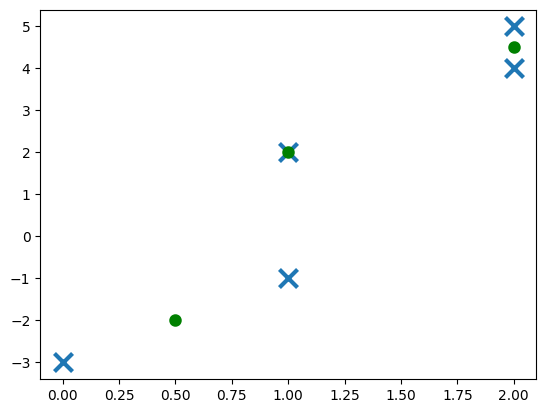

In [355]:
plt.scatter(data[:, 0], data[:, 1],marker='x', s=169, linewidths=3)
plt.scatter(centers1[:, 0], centers1[:, 1], color='red')
plt.scatter(centers2[:, 0], centers2[:, 1], linewidths=3, color='green')

### 任务2：
### 现有253个A股上市公司某一时期财务指标数据，这5个变量分别是：企业规模、企业净利润、资产负债率、流动资产周转率、营业收入增长率。利用已有数据，对253个上市公司进行聚类。

#### 1.导入相关的库（numpy、pandas、matplotlib、sklearn中的KMeans）

In [356]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler

#### 2.采集数据：从Excel文件中读取了包含253个A股上市公司某一时期财务指标的数据集 

data=pd.read_excel（‘文件名的路径’）

In [357]:
data=pd.read_excel('上市公司财务指标.xlsx')
data1=data.head(5)
data1

,股票简称,企业规模（百万）,企业净利润（百万）,资产负债率,流动资产周转率A,营业收入增长率A
0,*ST 爱迪,4525.654112,-28830.865296,0.419116,0.561476,-0.548441
1,*ST 柏龙,2703.951157,11649.754521,0.271789,0.442287,0.044020
2,*ST 东洋,3843.094778,7384.060379,0.248809,0.408842,0.417830
3,*ST 广田,24444.193026,13259.965670,0.711313,0.609233,0.180005
4,*ST 海投,6613.278572,34612.345490,0.274570,0.063739,-0.087500


#### 3.提取特征向量：提取除“股票简称”以外的特征列（剩下5个变量）

features=data.iloc[?,?]

In [358]:
features = pd.DataFrame(data,columns=['企业规模（百万）','企业净利润（百万）','资产负债率','流动资产周转率A','营业收入增长率A'])
# features = features.dropna()
features1=features.head(5)
features1

,企业规模（百万）,企业净利润（百万）,资产负债率,流动资产周转率A,营业收入增长率A
0,4525.654112,-28830.865296,0.419116,0.561476,-0.548441
1,2703.951157,11649.754521,0.271789,0.442287,0.044020
2,3843.094778,7384.060379,0.248809,0.408842,0.417830
3,24444.193026,13259.965670,0.711313,0.609233,0.180005
4,6613.278572,34612.345490,0.274570,0.063739,-0.087500


#### 4.数据预处理：标准化（归一化）特征向量 

scaled_features=MinMaxScaler().fit_transform(features)

In [359]:
scaled_features=MinMaxScaler().fit_transform(features)
scaled_features

array([[0.01183218, 0.3635962 , 0.41237248, 0.04413694, 0.12742651],
       [0.00665601, 0.39040903, 0.26222419, 0.03398474, 0.16398963],
       [0.00989276, 0.38758359, 0.23880413, 0.03113598, 0.18705893],
       ...,
       [0.01244775, 0.39331172, 0.53885509, 0.08008586, 0.16245307],
       [0.01082028, 0.39329508, 0.2147471 , 0.05314844, 0.1567362 ],
       [0.00131521, 0.3828403 , 0.22178331, 0.04573503, 0.15785156]])

#### 5.使用Kmeans算法训练数据 

创建Kmeans类实例化对象\
fit(标准化后的特征向量)\
获取簇标签kmeans.labels_和簇中心kmeans.cluster_centers_\
统计每个簇中的数据点数量np.bincount(labels)\
将带有簇类标签的数据保存到 Excel表data.to_excel(保存文件的路径名)

In [367]:
n_clusters = 3 # 分簇的数量
n_init = 10 # 指定kmeans算法重复运行次数
estimator = KMeans(init='k-means++', n_clusters=n_clusters, n_init=n_init)  # 设置n_clusters=1是为了计算SSE值
estimator = estimator.fit(scaled_features)
print("簇标签：")
print(estimator.labels_)
print("簇中心：")
print(estimator.cluster_centers_)

簇标签：
[1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0
 1 1 1 0 1 0 0 1 1 0 1 0 0 0 2 0 0 2 0 0 0 1 0 1 2 2 1 1 0 0 1 0 0 0 1 1 0
 1 0 1 1 1 0 0 1 1 1 1 2 1 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 2 1 1 1 1 0 1 1
 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 2 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0
 0 1 1 1 1 1 1 1 0 1 0 1 0 2 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0
 0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1]
簇中心：
[[0.02349665 0.38295723 0.63188958 0.10103672 0.19513912]
 [0.01179019 0.39477056 0.2834045  0.08960556 0.17716388]
 [0.61004028 0.66726192 0.75134133 0.05296031 0.23488539]]


#### 6.评估模型
SSE:kmeans.inertia_<br>
SC:metrics.silhouette_score(scaled_features, kmeans.labels_, metric='euclidean')<br>
DBI:metrics.davies_bouldin_score(scaled_features, kmeans.labels_)<br>
CH:metrics.calinski_harabasz_score(scaled_features, kmeans.labels_)))  

In [361]:
from sklearn import metrics

print('SSE:',estimator.inertia_,
'\nSC:',metrics.silhouette_score(features, estimator.labels_, metric='euclidean'),
'\nDBI:',metrics.davies_bouldin_score(features, estimator.labels_),
'\nCH:',metrics.calinski_harabasz_score(features, estimator.labels_))           

SSE: 9.061653200248594 
SC: 0.10157984416746889 
DBI: 2.984230622484489 
CH: 110.26297364207072


#### 7.可视化聚类结果：
plt.scatter(scaled_features[:, m], scaled_features[:, n], c=labels, cmap='viridis')\
plt.scatter(centers[:, m], centers[:, n], c='red', marker='x')

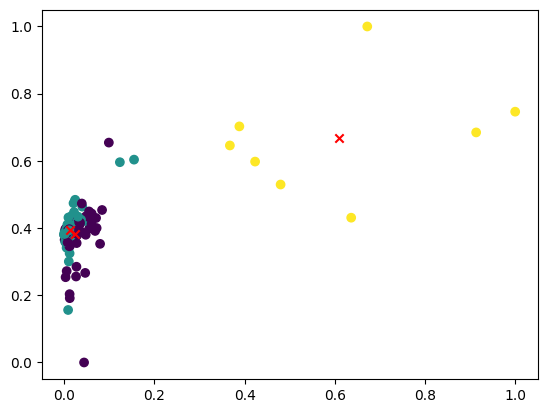

In [362]:
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=estimator.labels_)
plt.scatter(estimator.cluster_centers_[:, 0], estimator.cluster_centers_[:, 1], c='red', marker='x')

In [372]:
from sklearn.cluster import DBSCAN


clustering = DBSCAN(eps=0.3, min_samples=2).fit(scaled_features)

In [373]:
clustering.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  2, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [374]:
clustering 

DBSCAN(eps=0.3, min_samples=2)

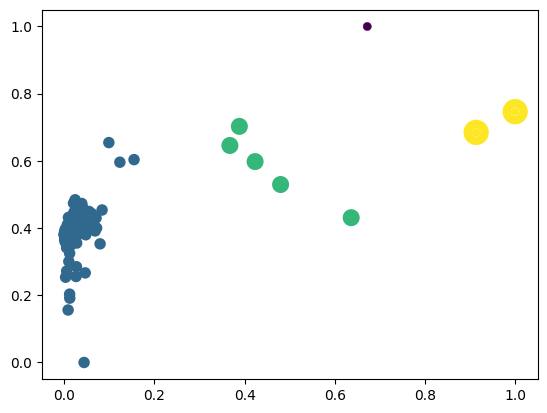

In [375]:
import matplotlib.pyplot as plt
plt.scatter(scaled_features[:,0],scaled_features[:,1],c=clustering.labels_+1.5,linewidths=np.power(clustering.labels_+1.5, 2))
plt.show()